# Hello AutoEncoder with stacked ANNs for FMNIST dataset

In [1]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("TensorFlow Version: ", tf.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3
TensorFlow Version:  2.18.0


### Get FMNIST Dataset

In [2]:
# Get dataset and split into training, validation, and test sets
f_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = f_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_val = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]

### Build and train the AutoEncoder

In [3]:
tf.random.set_seed(42)

ae_stacked_encoder = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])
ae_stacked_decoder = keras.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(28 * 28),
    keras.layers.Reshape([28, 28])
])
ae_stacked = keras.Sequential([ae_stacked_encoder, ae_stacked_decoder])

ae_stacked.compile(loss="mse", optimizer="nadam")                   


In [4]:
ae_stacked.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Note X_train used for both inputs and targets, same for validation data
history = ae_stacked.fit(X_train, X_train, epochs=20, validation_data=(X_val, X_val))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0355 - val_loss: 0.0184
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0174 - val_loss: 0.0164
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0148 - val_loss: 0.0148
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0145 - val_loss: 0.0146
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0142 - val_loss: 0.0145
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0140 - val_loss: 0.0143
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0139 - val_loss: 0.0142
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0138 - val_loss: 0.0141
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0137 - val_loss: 0.0139
Epoch 12/20
1719/1719 ━━━━━━━━

In [6]:
ae_stacked.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 30)             │        81,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │        82,284 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,445 (1.87 MB)

 Trainable params: 163,814 (639.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,631 (1.25 MB)

### Visualize Reconstruction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


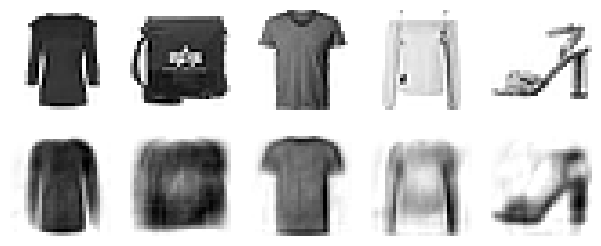

In [7]:
def viz_reconstructions(model, images=X_val, n_images=5):
    reconstruct = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstruct[image_index], cmap="binary")
        plt.axis("off")

viz_reconstructions(ae_stacked)
plt.show()

### Use t-SNE to further reduce dimensions 

Take the encoder output of 30 dimensions and further reduce to 2

In [8]:
from sklearn.manifold import TSNE

X_val_compressed = ae_stacked_encoder.predict(X_val)
tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_val_2D = tsne.fit_transform(X_val_compressed)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step


Plot the encoder output reduced to 2 Dimensions

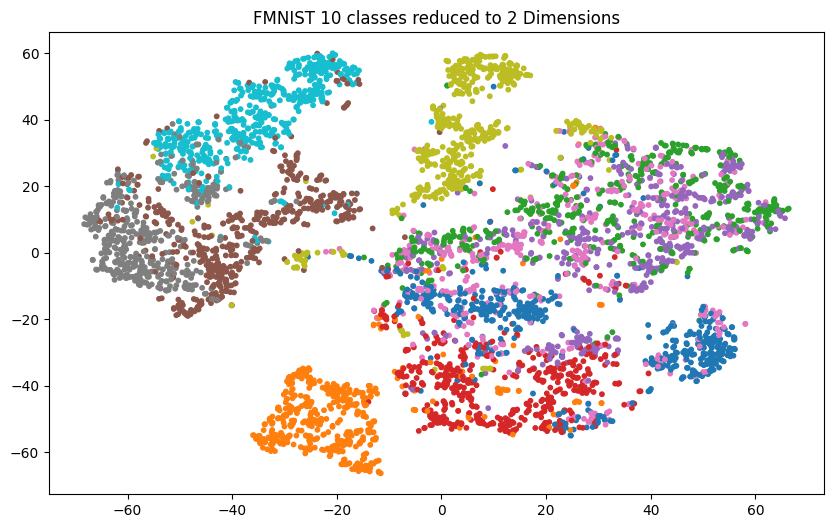

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_val, s=10, cmap="tab10")
plt.title("FMNIST 10 classes reduced to 2 Dimensions")
plt.show()

### Tie (share) weights between Encoder and Decoder 

Decoder will use a Transpose or Encoder's weights (halves the number of weights to be trained).  Not supported by Keras directly, need to build a custom layer

In [15]:
class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=self.dense.input_shape[-1],
                                      initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(Z + self.biases)

Build & Train model including the CUstom Dense layer

In [16]:

dense_1 = layers.Dense(100, activation="relu")
dense_2 = layers.Dense(30, activation="relu")

ae_tied_weights_encoder = keras.Sequential([
    layers.Flatten(),
    dense_1,
    dense_2
])

aw_tied_weights_decoder = keras.Sequential([
    DenseTranspose(dense_2, activation="relu"),
    DenseTranspose(dense_1),
    layers.Reshape([28, 28])
])

ae_tied_weights = keras.Sequential([ae_tied_weights_encoder, aw_tied_weights_decoder])

ae_tied_weights.compile(loss="mse", optimizer="nadam")

In [17]:
ae_tied_weights.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = ae_tied_weights.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))